In [10]:
consumer_key = 'w3as5bWjsiL7lE5Zp5iDGlvyk'
consumer_secret = 'reH3HcOheQ2XO9G2r4LTgvL8z3wjZU5o7J4VGNWq4ExVHGpygd'
access_token = '937619443525369856-riXDgWRmf7k95BmUCsXBIrfSZky8lt0'
access_token_secret = '3Mk9fSR0Suk9fmMGJmJURjw4QGGxw3J9pj8rjChTtn6vp'

In [111]:
from random import randint
import os
import pandas as pd
import numpy as np
import tweepy
import nltk
import re
import networkx
import matplotlib.pyplot as plt
import seaborn as sns
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim()
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from scikitplot.metrics import plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()
import demoji
demoji.download_codes()
from wordcloud import WordCloud
from googletrans import Translator
translator = Translator()
import nltk
nltk.download('stopwords')

C:\Users\sidha\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


... OK (Got response in 1.36 seconds)
Writing emoji data to C:\Users\sidha\.demoji/codes.json ...
... OK


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sidha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [12]:
import pandas as pd
df = pd.read_csv("clean_tweets_again.csv")

In [5]:
df.dropna(inplace = True)
df.drop(columns = 'Unnamed: 0',inplace = True)

In [6]:
X = df['text']
y = df['sentiment']

In [7]:
clf = LogisticRegression(verbose = 35,n_jobs = -1)
tfidf = TfidfVectorizer(max_features = 90000,stop_words ='english',ngram_range = (1,3))
pipeline = Pipeline([('vectorizer',tfidf),('classifier',clf)],verbose = True)
pipeline.fit(X,y)

[Pipeline] ........ (step 1 of 2) Processing vectorizer, total= 1.4min


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[Pipeline] ........ (step 2 of 2) Processing classifier, total=  37.5s


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   37.3s finished


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=90000,
                                 min_df=1, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True,

In [15]:
auth = tw.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tw.API(auth,wait_on_rate_limit = True)

In [18]:
hashtags = [ '#nirbhaya','#justicefornirbhaya','#delhigangrape','#metooindia','#vellore','#rapeinindia','#justiceforpriyanka','#CAAProtest','#procaa']
data = []
for val in hashtags:
    for tweet in tweepy.Cursor(api.search,q = val,tweet_mode = 'extended').items(randint(200,350)):
        tweet_details = {}
        tweet_details['name'] = tweet.user.screen_name
        tweet_details['tweet'] = tweet.full_text
        tweet_details['retweets'] = tweet.retweet_count
        tweet_details['location'] = tweet.user.location
        tweet_details['created'] = tweet.created_at.strftime("%d-%b-%Y")
        tweet_details['followers'] = tweet.user.followers_count
        tweet_details['is_user_verified'] = tweet.user.verified
        data.append(tweet_details)

In [21]:
df = pd.DataFrame(data)

In [22]:
df.to_csv('newdata.csv')

In [27]:
# r'@[A-Za-z0-9_]+|https?:\/\/[^ ]+'
username_hyper_link = r'https?:\/\/[^ ]+'
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not",
                 "aren't":"are not",
                 "wasn't":'was not',
                 "weren't":'were not',
                 "haven't":"have not",
                 "hasn't":'has not',
                 "hadn't":"had not",
                 "won't":"will not",
                 "wouldn't":"would not",
                 "don't":"do not",
                 "doesn't":"does not",
                 "didn't":"did not",
                 "can't":"can not",
                 "couldn't":"could not",
                 "shouldn't":"should not",
                 "mightn't":"might not",
                 "mustn't":"must not"
    
}

def find_replace_multi_ordered(string,dictonary):
    for item in dictonary.keys():
        string = re.sub(item,dictonary[item],string)
    return string
neg_handeled = df['tweet'].apply(lambda x : find_replace_multi_ordered(x,negations_dic))

In [30]:
def improved_tweet_cleaner(text):
    soup = BeautifulSoup(text,'lxml')
    good_soup = soup.get_text()
    remove_latin_tokens = re.sub(r'ï¿½','?',good_soup)
    user_name_hyperlink = re.sub(username_hyper_link,'',remove_latin_tokens)
    www_removed = re.sub(www_pat,'',user_name_hyperlink)
    return ("".join(www_removed)).strip()

In [32]:
new_and_improved_clean_text = neg_handeled.apply(lambda x : improved_tweet_cleaner(x))
df['tweet'] = new_and_improved_clean_text
df['length'] = df['tweet'].apply(lambda x : len(x))
df['is_retweet'] = df['retweets'].apply(lambda x : 1 if x > 0 else 0)

In [33]:
# percent of tweets that have mentions and are not retweets
mention_tweets = df[~df['tweet'].str.contains('RT') & df['tweet'].str.contains('@')]
plain_text_tweets = df[~df['tweet'].str.contains('RT') & ~df['tweet'].str.contains('@')]

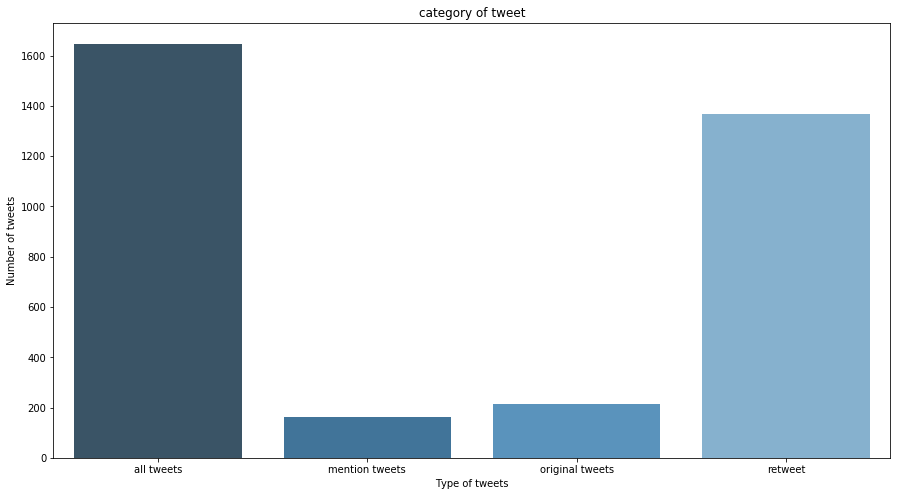

In [34]:
all_the_tweets = [len(df),len(mention_tweets),len(plain_text_tweets),df['is_retweet'].sum()]
item_list = ['all tweets','mention tweets','original tweets','retweet']
plt.figure(figsize = (15,8))
sns.barplot(x = item_list,y = all_the_tweets,saturation=0.80,palette="Blues_d")
plt.title('category of tweet')
plt.xlabel('Type of tweets')
plt.ylabel('Number of tweets')
plt.show()

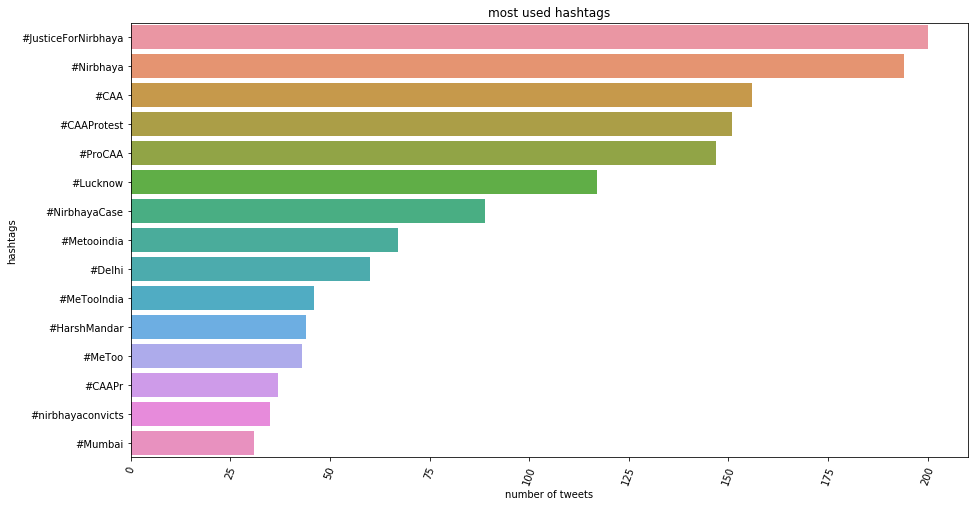

In [36]:
# checking most used hashtags
#making list of all the hashtags in the tweets
hashtags = []
hashtags_list = list(df['tweet'].apply(lambda x : re.findall(r"#[a-zA-Z]+",x)))
hashtag_dict = {}
for match in hashtags_list:
    for single_match in match:
        if single_match not in hashtag_dict.keys():
            hashtag_dict[single_match] = 1
        else:
            hashtag_dict[single_match] = hashtag_dict[single_match] + 1
hashtag_ordered_list = sorted(hashtag_dict.items(),key = lambda x : x[1],reverse = True)
hashtags_columns = pd.DataFrame(hashtag_ordered_list)
hashtags_columns.columns = ['hashtags','frequency of the hashtags']

plt.figure(figsize = (15,8))
sns.barplot(data = hashtags_columns[:15],y = 'hashtags',x = 'frequency of the hashtags')
plt.title('most used hashtags')
plt.xlabel('number of tweets')
plt.ylabel('hashtags')
degrees = 70
plt.xticks(rotation=degrees)
plt.show()

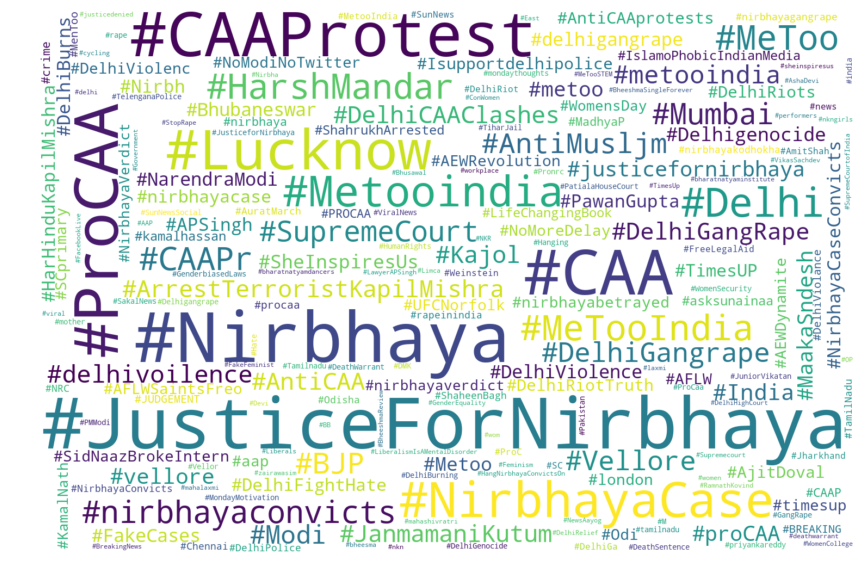

In [39]:
wordcloud = WordCloud(width=1500, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(dict(hashtag_ordered_list))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

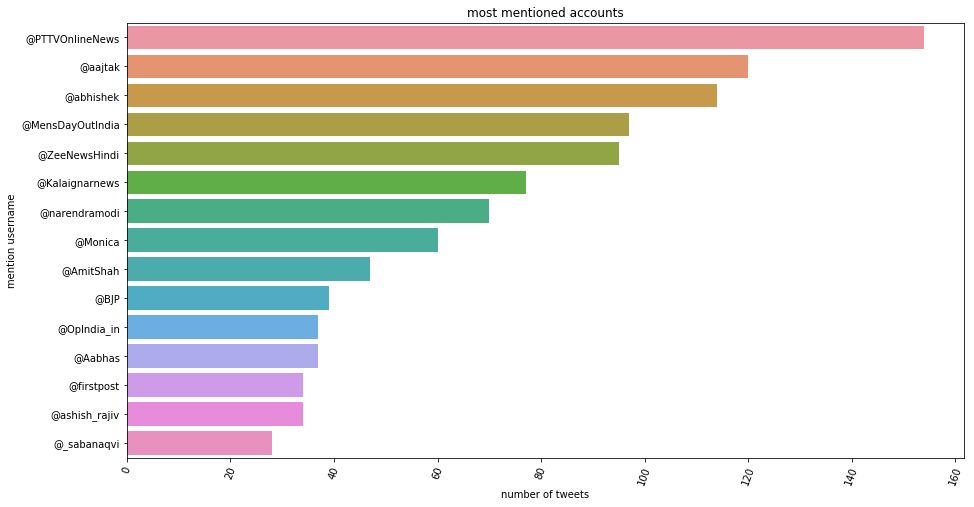

In [40]:
mentions = []
mention_pattern = list(df['tweet'].apply(lambda x : re.findall(r'@[a-zA-Z_]+',x)))
mention_dict = {}
for match in mention_pattern:
    for single_match in match:
        if single_match not in mention_dict.keys():
            mention_dict[single_match] = 1
        else:
            mention_dict[single_match] = mention_dict[single_match] + 1
mention_ordered_list = sorted(mention_dict.items(),key = lambda x : x[1],reverse = True)
mention_dataframe = pd.DataFrame(mention_ordered_list)
mention_dataframe.columns = ['mentions','mention frequency']

plt.figure(figsize = (15,8))
sns.barplot(data = mention_dataframe[:15],y = 'mentions',x = 'mention frequency')
plt.title('most mentioned accounts')
plt.xlabel('number of tweets')
plt.ylabel('mention username')
degrees = 70
plt.xticks(rotation=degrees)
plt.show()    

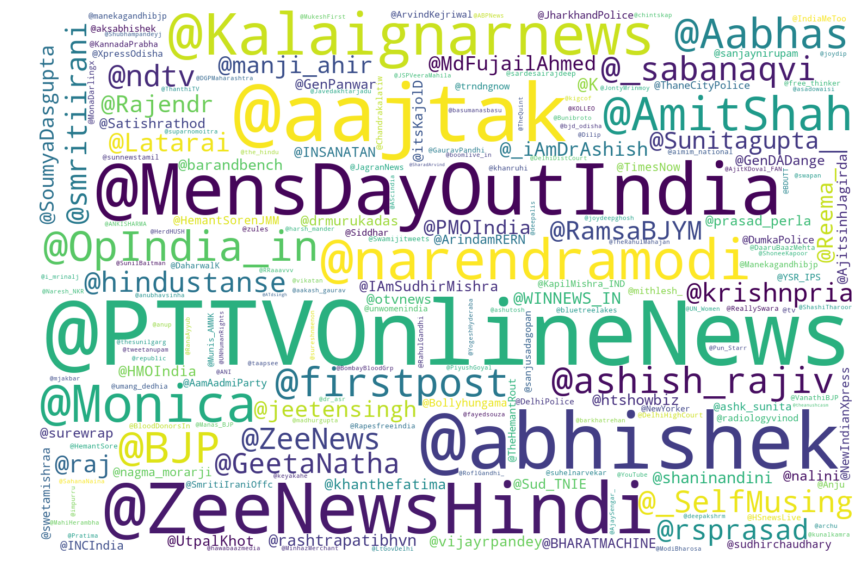

In [41]:
wordcloud = WordCloud(width=1500, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(dict(mention_ordered_list))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [42]:
# looking at users who are posting this tweets
print('number of users tweeting are',len(df['name'].unique()))

number of users tweeting are 1401


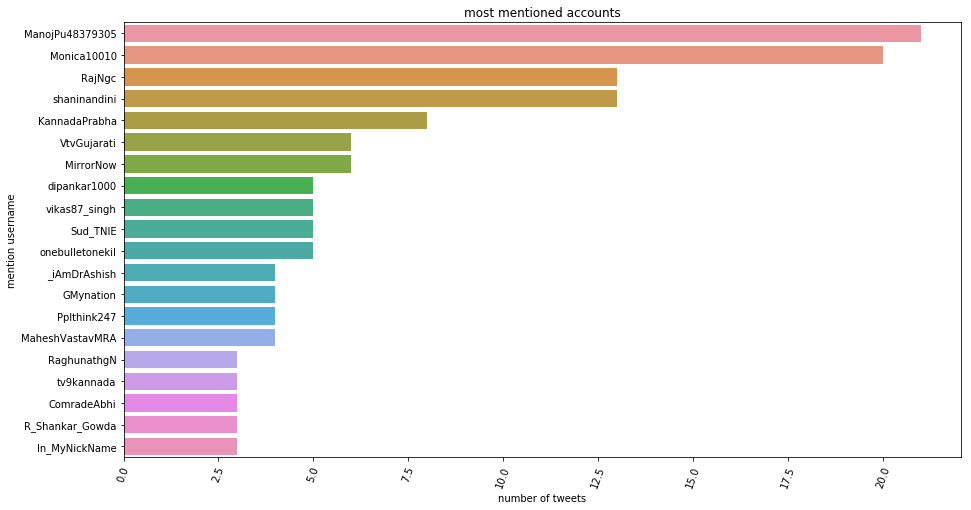

In [45]:
# checking the users who have tweeted or retweeted the most
most_active_users = df.groupby('name').count()['tweet'].sort_values(ascending = False)
most_active_users = pd.DataFrame(most_active_users).reset_index()
most_active_users.columns
plt.figure(figsize = (15,8))
sns.barplot(data = most_active_users[:20],y = 'name',x = 'tweet')
plt.title('most mentioned accounts')
plt.xlabel('number of tweets')
plt.ylabel('mention username')
degrees = 70
plt.xticks(rotation=degrees)
plt.show()

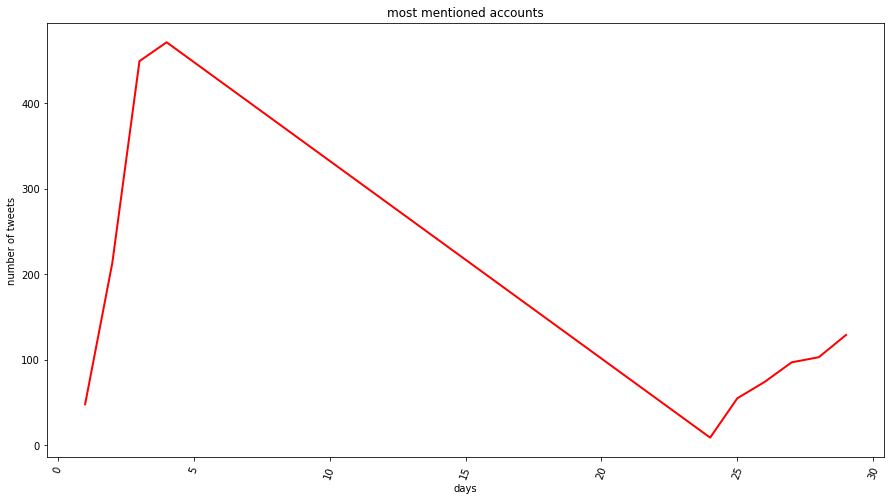

In [47]:
# time series analysis
df['timestamp'] = pd.to_datetime(df['created'])
def giveday(timestamp):
    day_string = timestamp.day
    return day_string
def givemonth(timestamp):
    month_string = timestamp.month
    return month_string
df['days'] = df['timestamp'].apply(giveday)
days = df.groupby('days').count()['tweet']

days = pd.DataFrame(days).reset_index()
plt.figure(figsize = (15,8))
sns.lineplot(data = days,x = 'days',y = 'tweet',linewidth = 2,color = 'red')
plt.title('most mentioned accounts')
plt.xlabel('days')
plt.ylabel('number of tweets')
degrees = 70
plt.xticks(rotation=degrees)
plt.show()

In [61]:

tamil_tweets = df['tweet'][100:150]


In [50]:
tamil = tamil_tweets.apply(lambda x : translator.detect(x).lang)

In [51]:
LANGUAGES = {
    'af': 'afrikaans','sq': 'albanian','am': 'amharic','ar': 'arabic','hy': 'armenian','az': 'azerbaijani',
    'eu': 'basque','be': 'belarusian','bn': 'bengali','bs': 'bosnian','bg': 'bulgarian','ca': 'catalan','ceb': 'cebuano','ny': 'chichewa','zh-cn': 'chinese (simplified)',
'zh-tw': 'chinese (traditional)','co': 'corsican','hr': 'croatian','cs': 'czech','da': 'danish','nl': 'dutch','en': 'english','eo': 'esperanto','et': 'estonian',
'tl': 'filipino','fi': 'finnish','fr': 'french','fy': 'frisian','gl': 'galician','ka': 'georgian','de': 'german','el': 'greek','gu': 'gujarati','ht': 'haitian creole',
'ha': 'hausa','haw': 'hawaiian','iw': 'hebrew','hi': 'hindi','hmn': 'hmong','hu': 'hungarian','is': 'icelandic','ig': 'igbo','id': 'indonesian','ga': 'irish',
'it': 'italian','ja': 'japanese','jw': 'javanese','kn': 'kannada','kk': 'kazakh','km': 'khmer','ko': 'korean','ku': 'kurdish (kurmanji)','ky': 'kyrgyz','lo': 'lao','la': 'latin',
'lv': 'latvian','lt': 'lithuanian','lb': 'luxembourgish','mk': 'macedonian','mg': 'malagasy','ms': 'malay','ml': 'malayalam','mt': 'maltese',
'mi': 'maori','mr': 'marathi','mn': 'mongolian','my': 'myanmar (burmese)','ne': 'nepali','no': 'norwegian','ps': 'pashto','fa': 'persian','pl': 'polish','pt': 'portuguese','pa': 'punjabi','ro': 'romanian','ru': 'russian','sm': 'samoan','gd': 'scots gaelic','sr': 'serbian','st': 'sesotho','sn': 'shona','sd': 'sindhi','si': 'sinhala','sk': 'slovak','sl': 'slovenian','so': 'somali','es': 'spanish',
'su': 'sundanese','sw': 'swahili','sv': 'swedish',
'tg': 'tajik','ta': 'tamil','te': 'telugu','th': 'thai','tr': 'turkish','uk': 'ukrainian','ur': 'urdu','uz': 'uzbek','vi': 'vietnamese','cy': 'welsh','xh': 'xhosa','yi': 'yiddish','yo': 'yoruba','zu': 'zulu','fil': 'Filipino',
    'he': 'Hebrew'
}

LANGCODES = dict(map(reversed, LANGUAGES.items()))

In [64]:
tamil_tweets = pd.DataFrame(tamil_tweets)

In [66]:
tamil_tweets['language code'] = tamil

In [70]:
tamil_tweets['language'] = tamil_tweets['language code'].replace(LANGUAGES)

In [72]:
tamil_tweets['translated'] = tamil_tweets['tweet'].apply(lambda x : translator.translate(x).text)

In [73]:
tamil_tweets

,tweet,language code,language,translated
1400,RT @Kalaignarnews: “பணம் கொடுப்பதாகச் சொல்லி ப...,ta,tamil,"RT @Kalaignarnews: ""The money brought to the r..."
1401,RT @Kalaignarnews: “பணம் கொடுப்பதாகச் சொல்லி ப...,ta,tamil,"RT @Kalaignarnews: ""The money brought to the r..."
1402,"Pro-CAA, 'goli maaro' slogans raised on Delhi ...",gu,gujarati,"Pro-Sia, shot my 'slogans raijhada on Delhi Me..."
1403,RT @firstpost: #ProCAA sloganeering and incend...,en,english,RT @firstpost: #ProCAA sloganeering and incend...
1404,RT @Kalaignarnews: “பணம் கொடுப்பதாகச் சொல்லி ப...,ta,tamil,"RT @Kalaignarnews: ""The money brought to the r..."


In [74]:
def improved_tweet_cleaner(text):
    soup = BeautifulSoup(text,'lxml')
    good_soup = soup.get_text()
    remove_latin_tokens = re.sub(r'ï¿½','?',good_soup)
    user_name_hyperlink = re.sub(username_hyper_link,'',remove_latin_tokens)
    www_removed = re.sub(www_pat,'',user_name_hyperlink)
    lower_case = www_removed.lower()
    letters_only = re.sub("[^a-zA-Z]"," ",lower_case) # this creates un-necessary white spaces so we will takel this by tokenization
    words = [x for x in token.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [75]:
tweets_to_predict = tamil_tweets['translated'].apply(lambda x : improved_tweet_cleaner(x))

In [121]:
tweets_to_predict

1400    rt kalaignarnews the money brought to the rall...
1401    rt kalaignarnews the money brought to the rall...
1402    pro sia shot my slogans raijhada on delhi metr...
1403    rt firstpost procaa sloganeering and incendiar...
1404    rt kalaignarnews the money brought to the rall...
Name: translated, dtype: object

In [124]:
X = tfidf.transform(tweets_to_predict)

In [125]:
pred = clf.predict(X)
pred

array([0, 0, 0, 0, 0], dtype=int64)

In [106]:
translator.translate('ita koto kharab ki amra nijer desher judiciary system te biswas korte parina').text

"Each of the country's Judiciary System koto unpleasant, we can not believe in"

In [112]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
example_sent = "Each of the country's Judiciary System koto unpleasant, we can not believe in"
stop_words = set(stopwords.words('english')) 
word_tokens = word_tokenize(example_sent) 
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
filtered_sentence = []  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
print(filtered_sentence) 

['Each', 'country', "'s", 'Judiciary', 'System', 'koto', 'unpleasant', ',', 'believe']


In [130]:
' '.join(filtered_sentence)

"Each country 's Judiciary System koto unpleasant , believe"

In [113]:
y = tfidf.transform(filtered_sentence)

In [131]:
from textblob import TextBlob
wiki = TextBlob("Each country 's Judiciary System koto unpleasant , believe")

In [133]:
wiki.sentiment

Sentiment(polarity=-0.6499999999999999, subjectivity=0.95)

In [136]:
pred = clf.predict(tfidf.transform(["Each country 's Judiciary System koto unpleasant , believe"]))

In [137]:
pred

array([0], dtype=int64)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)